In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

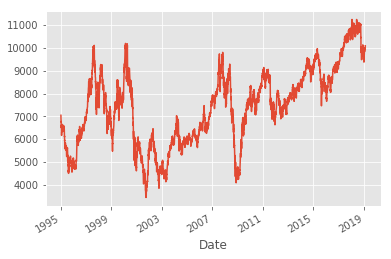

In [6]:
stock_name='^TWSE'
df = web.DataReader(stock_name, 'stooq', start, end)
df['Close'].plot()
plt.show()

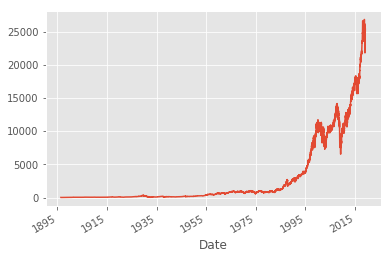

In [4]:
stock_name='^DJI'
df = web.DataReader(stock_name, 'stooq', start, end)
df['Close'].plot()
plt.show()

                Open      High       Low     Close       Volume
Date                                                           
2019-02-12  20442.55  20885.88  20432.80  20864.21          NaN
2019-02-08  20510.50  20562.39  20315.46  20333.17  888594200.0
2019-02-07  20812.22  20844.77  20665.51  20751.28  727743200.0
2019-02-06  20928.87  20968.03  20861.95  20874.06  710047600.0
2019-02-05  20960.47  20981.23  20823.18  20844.45  674933500.0


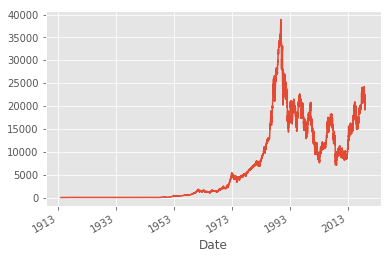

In [9]:
stock_name='^NKX'
df = web.DataReader(stock_name, 'stooq', start, end)
print(df.head())

df['Close'].plot()
plt.show()